In [351]:
import pandas as pd
import numpy as np
from numpy.core.umath_tests import inner1d
import matplotlib.pyplot as plt

In [352]:
house_train = pd.read_csv("house-pred/train.csv")
house_test = pd.read_csv("house-pred/test.csv")

In [403]:
house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Inside,Gtl,CollgCr,...,0,0,0,NaN,NaN,NaN,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,FR2,Gtl,Veenker,...,0,0,0,NaN,NaN,NaN,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Inside,Gtl,CollgCr,...,0,0,0,NaN,NaN,NaN,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Corner,Gtl,Crawfor,...,272,0,0,NaN,NaN,NaN,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,FR2,Gtl,NoRidge,...,0,0,0,NaN,NaN,NaN,2008,WD,Normal,250000


In [405]:
house_train_num = df_num = house_train.select_dtypes(include=['float64', 'int'])

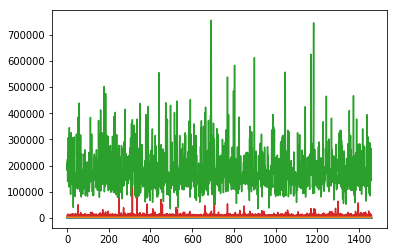

In [406]:
plt.plot(house_train_num)

#### Removing Unnecessary variables

In [354]:
house_train.drop(['3SsnPorch', 'Street', 'LandContour', 'Condition2', 'BsmtFinSF2', 'Utilities', 'BsmtHalfBath', 'BsmtCond', 'MoSold', 'MiscVal'], axis=1, inplace=True)
house_test.drop(['3SsnPorch', 'Street', 'LandContour', 'Condition2', 'BsmtFinSF2', 'Utilities', 'BsmtHalfBath', 'BsmtCond', 'MoSold', 'MiscVal'], axis=1, inplace=True)

In [373]:
house_test.shape

(1459, 70)

In [295]:
from sklearn.preprocessing import LabelEncoder
def preProcessing(df):
    le = LabelEncoder()
    df_result = df.copy()
    
    for column in df_result:
        if type(df_result[column][0]) == str:
            #print('Col: %s' %column)
            df_result[column].fillna('N/A', inplace=True) # Missing values
            df_result[column] = le.fit_transform(df_result[column]) # Factorize
        else:
            if column == 'Alley' or column == 'MiscFeature' or column == 'Fence' or column == 'ExterQual' \
                or column == 'ExterCond' or column == 'BsmtQual' or column == 'BsmtCond' or column == 'BsmtExposure' :
                    df_result[column].fillna('N/A', inplace=True) # Missing values
                    df_result[column] = le.fit_transform(df_result[column]) # Factorize
            else:
                df_result[column].fillna(0, inplace=True) # Missing values
                
    df_result.drop(['3SsnPorch', 'Street', 'LandContour', 'Condition2', 
                    'BsmtFinSF2', 'Utilities', 'BsmtHalfBath', 'BsmtCond', 'MoSold', 'MiscVal'], axis=1, inplace=True)
      
    return df_result

In [296]:
house_train_prepd = preProcessing(house_train)
house_test_prepd = preProcessing(house_test)

### Alternate for PreProcessing

In [378]:
def data_pre(df):
    df_num = df.select_dtypes(include=['float64', 'int'])
    df_cat = df.select_dtypes(exclude=['float64', 'int'])
    df_cat.fillna('nan',inplace=True)
    df_num.fillna(0, inplace=True)
    df_cat = df_cat.apply(labelencoder.fit_transform)
    #house_cat_new = pd.get_dummies(house_cat)
    #house_cat_new.shape
    ####### joining numerical and catagorical features ########
    df_prepd = pd.concat([df_num, df_cat], axis=1)
    return df_prepd


In [379]:
house_train_prepd = data_pre(house_train)
house_test_prepd = data_pre(house_test)


/home/ea/.local/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [380]:
house_train_prepd.shape

(1460, 71)

In [381]:
house_y = house_train_prepd['SalePrice']
house_x = house_train_prepd.drop('SalePrice',axis=1)

In [382]:
corr_mat = house_num.corr()
corr_mat['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.209624
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

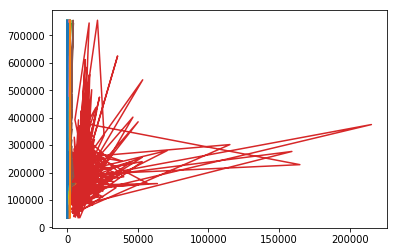

In [407]:
plt.plot(house_train_num.drop('SalePrice', axis=1),house_y)

### Training and Evaluation Of Model

In [383]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [384]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [385]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf = 8)

In [386]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features = 10, min_samples_leaf=1, random_state=101, bootstrap=False)

In [387]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, house_x, house_y,scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(lin_reg, house_x, house_y,scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-lin_scores)

rnd_scores = cross_val_score(rnd_reg, house_x, house_y,scoring="neg_mean_squared_error", cv=3)
rnd_rmse_scores = np.sqrt(-rnd_scores)


In [388]:
display_scores(tree_rmse_scores)

Scores: [45717.20520888 45972.47647457 44922.05151856]
Mean: 45537.24440067156
Standard deviation: 447.3161197043076


In [389]:
display_scores(lin_rmse_scores)

Scores: [29208.37996336 35285.50480985 40869.54355661]
Mean: 35121.14277660894
Standard deviation: 4762.068545326257


In [390]:
display_scores(rnd_rmse_scores)

Scores: [24411.5529022  31422.90674839 29153.17203286]
Mean: 28329.210561148295
Standard deviation: 2921.067735065146


In [391]:
#tree_reg.fit(house_x,house_y)

In [369]:
rnd_reg.fit(house_x,house_y)
for	name, score in zip(house_x, rnd_reg.feature_importances_):
    print(name, score[score>0.1])

Id []
MSSubClass []
LotFrontage []
LotArea []
OverallQual [0.14568123]
OverallCond []
YearBuilt []
YearRemodAdd []
MasVnrArea []
BsmtFinSF1 []
BsmtFinSF2 []
BsmtUnfSF []
TotalBsmtSF []
1stFlrSF []
2ndFlrSF []
LowQualFinSF []
GrLivArea []
BsmtFullBath []
BsmtHalfBath []
FullBath []
HalfBath []
BedroomAbvGr []
KitchenAbvGr []
TotRmsAbvGrd []
Fireplaces []
GarageYrBlt []
GarageCars []
GarageArea []
WoodDeckSF []
OpenPorchSF []
EnclosedPorch []
3SsnPorch []
ScreenPorch []
PoolArea []
MiscVal []
MoSold []
YrSold []
MSZoning []
Street []
Alley []
LotShape []
LandContour []
Utilities []
LotConfig []
LandSlope []
Neighborhood []
Condition1 []
Condition2 []
BldgType []
HouseStyle []
RoofStyle []
RoofMatl []
Exterior1st []
Exterior2nd []
MasVnrType []
ExterQual []
ExterCond []
Foundation []
BsmtQual []
BsmtCond []
BsmtExposure []
BsmtFinType1 []
BsmtFinType2 []
Heating []
HeatingQC []
CentralAir []
Electrical []
KitchenQual []
Functional []
FireplaceQu []
GarageType []
GarageFinish []
GarageQual

In [392]:
rnd_reg.fit(house_x,house_y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=101,
           verbose=0, warm_start=False)

In [393]:
pred = rnd_reg.predict(house_test_prepd)

In [399]:
dfResult = pd.DataFrame()

In [401]:
dfResult['Id'] = house_test['Id']
dfResult['SalePrice'] = pred
dfResult.to_csv('result.csv', index=False)
